<a href="https://colab.research.google.com/github/leesua-github/bigdata/blob/main/%EA%B8%B0%EB%A7%90%ED%8F%89%EA%B0%80(21006039%20%EC%9D%B4%EC%88%98%EC%95%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기말고사
각 텍스트 문제 뒤에 코드블럭을 생성하여 문제에 대한 답을 코드로 적어보자. 과제는 올림픽 메달 집계 위키페이지 데이터를 지시대로 가공하는 것이다. 오픈북이니 마음껏 검색하거나 예전 수업자료를 보아도 된다. 단, 판다스 라이브러리를 사용해야 한다. 문제는 총 13문제이다.

*   코드를 완성, 실행한 후 깃허브 저장소에 **'기말고사(학번 이름)'의 파일명**으로 사본저장한다.
* 업로드 후 **저장소** 주소와 노션 포트폴리오 주소를 pdf로 작성하여 캔버스로 제출한다 (4시 반까지)

** 아래 코드로 데이터를 가져올 수 없다면 구글에서 '올림픽 메달 집계' 검색 후 위키페이지의 주소를 복사해서 알맞게 코드를 변형한다. (교재 p.252 참조)

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
#데이터 불러오기
import pandas as pd
df=pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84', header=0, index_col=0) #맨 위의 헤더를 열 이름, 나라 이름을 인덱스 이름으로
df[0]

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
국가 (IOC 코드),,,,,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


1. 하계올림픽 관련 정보만 추출해서 summer라는 데이터프레임에 저장하자. summer 데이터프레임을 나타내보자.

In [ ]:
summer=df[0].iloc[:,:5]
summer

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


2. 동계올림픽 관련 정보만 추출해서 winter라는 데이터프레임에 저장하자. winter 데이터프레임을 나타내보자.

In [ ]:
winter=df[0].iloc[:, range(5,10)]
winter

,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


3. summer 데이터 프레임 열 이름을 '하계참가횟수', '금', '은', '동', '하계 계'로 지어서 지정하자. 열 이름을 바꾼 후 summer 데이터프레임을 나타내보자.

In [ ]:
summer.columns=['하계참가횟수','금','은','동','하계 계']
summer

,하계참가횟수,금,은,동,하계 계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


4. winter 데이터 프레임 열 이름을 '동계참가횟수', '금', '은', '동', '동계 계'로 지어서 지정하자. 열 이름을 바꾼 후 winter 데이터프레임을 나타내보자.

In [ ]:
winter.columns=['동계참가횟수','금','은','동','동계 계']
winter

,동계참가횟수,금,은,동,동계 계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


5. 동계와 하계 프레임을 합쳐보자. 합친 데이터프레임을 olympics_data로 이름짓는다. olympics_data 데이터프레임을 나타내보자.



In [ ]:
import pandas as pd
olympics_data=pd.concat([summer,winter],axis=1)
olympics_data

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계
국가 (IOC 코드),,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0
알제리 (ALG),13,5,4,8,17,3,0,0,0,0
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17


6. 하계대회 참가횟수대비 하계 총 메달 수(rate1), 동계대회 참가횟수대비 동계 총 메달 수(rate2) 열을 생성해서 olympics_data 마지막 열에 붙여보자. olympics_data 데이터프레임을 나타내보자.

In [ ]:
print(summer['하계 계']/summer['하계참가횟수'])
print(winter['동계 계']/winter['동계참가횟수'])

국가 (IOC 코드)
아프가니스탄 (AFG)             0.142857
알제리 (ALG)                1.307692
아르헨티나 (ARG)              3.083333
아르메니아 (ARM)              2.333333
오스트랄라시아 (ANZ) [ANZ]      6.000000
                          ...    
독립 (IOA) [IOA]           0.666667
독립 참가 (IOP) [IOP]        3.000000
러시아 출신 올림픽 선수 (OAR)           NaN
혼성 (ZZX) [ZZX]           5.666667
총합                     560.285714
Length: 153, dtype: float64
국가 (IOC 코드)
아프가니스탄 (AFG)                  NaN
알제리 (ALG)                0.000000
아르헨티나 (ARG)              0.000000
아르메니아 (ARM)              0.000000
오스트랄라시아 (ANZ) [ANZ]           NaN
                          ...    
독립 (IOA) [IOA]                NaN
독립 참가 (IOP) [IOP]             NaN
러시아 출신 올림픽 선수 (OAR)     17.000000
혼성 (ZZX) [ZZX]                NaN
총합                     137.826087
Length: 153, dtype: float64


In [ ]:
rate1_tabel=pd.DataFrame(summer['하계 계']/summer['하계참가횟수'],columns = ['rate1'])
rate1_tabel

,rate1
국가 (IOC 코드),
아프가니스탄 (AFG),0.142857
알제리 (ALG),1.307692
아르헨티나 (ARG),3.083333
아르메니아 (ARM),2.333333
오스트랄라시아 (ANZ) [ANZ],6.000000
...,...
독립 (IOA) [IOA],0.666667
독립 참가 (IOP) [IOP],3.000000
러시아 출신 올림픽 선수 (OAR),NaN


In [ ]:
rate2_table=pd.DataFrame(winter['동계 계']/winter['동계참가횟수'],columns = ['rate2'])
rate2_table

,rate2
국가 (IOC 코드),
아프가니스탄 (AFG),NaN
알제리 (ALG),0.000000
아르헨티나 (ARG),0.000000
아르메니아 (ARM),0.000000
오스트랄라시아 (ANZ) [ANZ],NaN
...,...
독립 (IOA) [IOA],NaN
독립 참가 (IOP) [IOP],NaN
러시아 출신 올림픽 선수 (OAR),17.000000


In [ ]:
added_olympics_data=pd.concat([summer,winter,rate1_tabel,rate2_table], axis=1)
added_olympics_data

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857,NaN
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692,0.000000
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333,0.000000
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333,0.000000
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000,NaN
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN,17.000000


7. olympics_data 데이터프레임의 기본정보를 조회해보자.
* rate1 과 rate2 의 결측치(NaN) 수는 각각 몇 개인가? (코드 칸에 #을 넣고 적어보자)

In [ ]:
olympics_data.info()
# rate1: 1개, rate2: 43개

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 아프가니스탄 (AFG) to 총합
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   하계참가횟수  153 non-null    int64
 1   금       153 non-null    int64
 2   은       153 non-null    int64
 3   동       153 non-null    int64
 4   하계 계    153 non-null    int64
 5   동계참가횟수  153 non-null    int64
 6   금       153 non-null    int64
 7   은       153 non-null    int64
 8   동       153 non-null    int64
 9   동계 계    153 non-null    int64
dtypes: int64(10)
memory usage: 13.1+ KB


8. 국가가 '총합'과 '연합 (EUN) [EUN]'인 행을 제거한 후 olympics_data 데이터프레임을 나타내보자.

9. 하계참가횟수 당 평균 메달 수가 15이상인 국가를 나타내보자. 

* 이 중 아시아 국가는 어느 국가인가?(코드 뒤 #을 넣고 써 보자)


In [ ]:
over=summer[(summer['하계 계']>15)]
over

# 한국, 중국, 일본

,하계참가횟수,금,은,동,하계 계
국가 (IOC 코드),,,,,
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
오스트레일리아 (AUS) [AUS] [Z],26,147,163,187,497
오스트리아 (AUT),27,18,33,36,87
아제르바이잔 (AZE),6,7,11,24,42
...,...,...,...,...,...
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523
우즈베키스탄 (UZB),6,8,6,17,31
유고슬라비아 (YUG) [YUG],18,28,31,31,90


10. olympics_data 데이터프레임의 rate1 변수가 높은대로 정렬해보자. 

* 어느 국가가 가장 하계대회 참가횟수당 평균 메달 수가 많은가?  (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

11. rate1 변수가 높은 순서대로 정렬하여 엑셀파일로 추출해보자. 파일 이름은 olympics.xlsx로 한다.

12. rate2 변수가 높은대로 정렬해보자. 
* 어느 국가가 가장 동계대회 참가횟수당 평균 메달 수가 많은가? (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

13. 하계참가횟수, 동계참가횟수, rate1, rate2의 상관관계를 히트맵(matplotlib & seaborn)으로 그려보자. 

* 하계대회 참가횟수 대비 메달 수와 동계대회 참가횟수 대비 메달 수의 상관계수는 얼마인가?  둘의 상관관계는 높은가 낮은가? 상관관계가 높다면(낮다면) 그 이유는 무엇이라고 생각하는가?(코드 뒤에 #을 넣어서 적어보자)

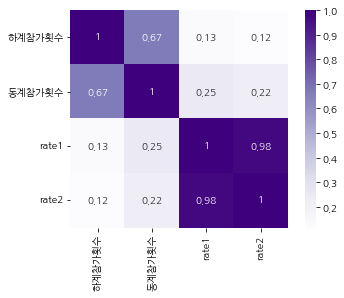

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=added_olympics_data[['하계참가횟수','동계참가횟수','rate1','rate2']].corr(),square=True, annot=True,cmap='Purples')
plt.show()

# 상관계수: 0.98
# 상관계수가 (+)이기 때문에 상관관계가 높다
# 스포츠 선수가 되기 위해서는 개인의 노력뿐만 아니라 국가나 지자체의 지원도 필요하다. 
# 그러므로 스포츠 산업에 관심이 높은 국가는 다양한 분야의 스포츠에 투자를 하기 때문에 
# 하계올림픽 성적이 좋을수록 동계올림픽 성적도 좋고, 동계올림픽 성적이 좋을수록 하계올림픽 성적도 좋은 결과가 나타난다.

학번: 21006039

이름: 이수아